# TIME SERIES ANALYSIS

# Goal: Find outliers, trends and periodicity in the MTA turnstile data
    

## DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.


The data was organized  by Dr. Sina Kashuk at CUSP.
You can get it from the github repo (use the download link to download it live in your notebook). 
It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


In [1]:
#from IPython.display import Image
#Image(filename = "Ridetypes.png")

## Each time series (per station, per ticket type) contains the number of swipes per week for 194 weeks from 05/21/2010 to 02/21/2014. 

The data are available to you as a *python data cube*. you can load it as 

```
np.load(“MTA_Fare.npy")
```

and you will end up with a python numpy array of 
shape (600, 23, 194)




In [2]:
import numpy as np
import pylab as pl
import pandas as pd
import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data=np.load('MTA_Fare.npy')

In [4]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [5]:
data=data.astype(float)

In [6]:
data[data==-1]=np.nan

In [7]:
rides=np.nanmean(data,axis=1)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [8]:
meanrides=np.nanmean(rides,axis=0)

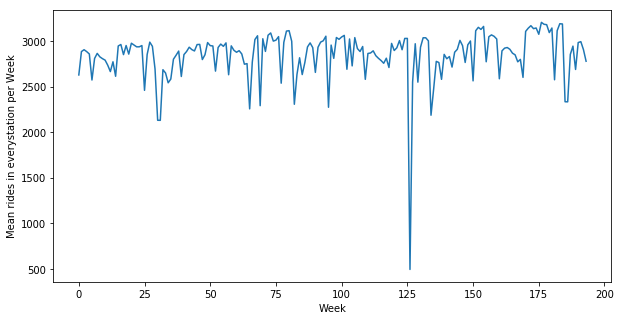

In [9]:
figsize(10,5)
pl.plot(meanrides)
pl.xlabel('Week')
pl.ylabel('Mean rides in everystation per Week');

In [10]:
start = datetime.date(2010, 5, 21)
start+datetime.timedelta(days=(np.where(meanrides==np.min(meanrides))[0][0]+1)*7)

datetime.date(2012, 10, 26)

#### Hurricane Sandy hit New York on October 29th of 2012

In [11]:
types=np.nansum(data,axis=0)

In [12]:
sum_type=np.nansum(types,axis=0)

In [13]:
ratio=[]
for i in range(0,194):
    ratio.append((types[:,i]/sum_type[i]))
ratio=np.array(ratio)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


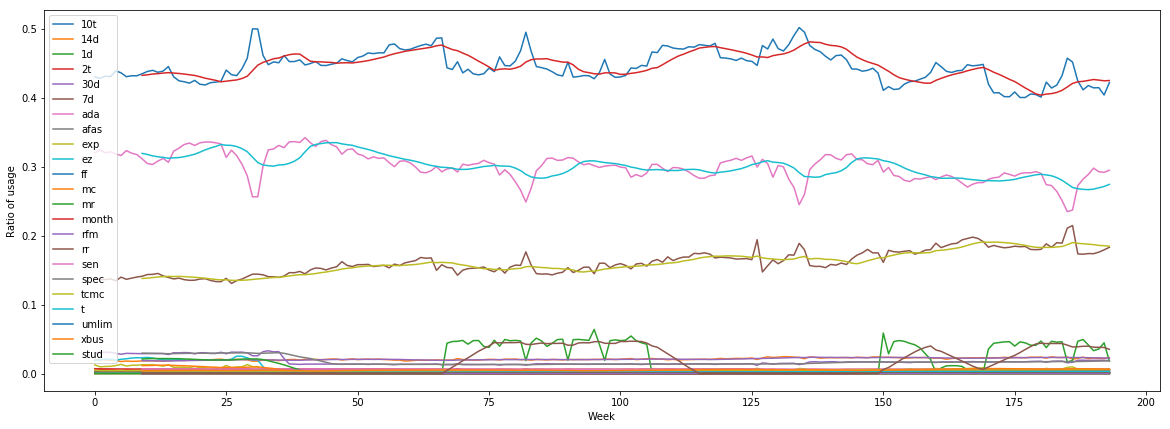

In [14]:
figsize(20,7)
for i in range(0,23):
    pl.plot(ratio[:,i])
for i in range(0,23):
    pl.plot(pd.rolling_mean(ratio[:,i],10))
pl.ylabel('Ratio of usage')
pl.xlabel('Week')
pl.legend(ridetype);

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


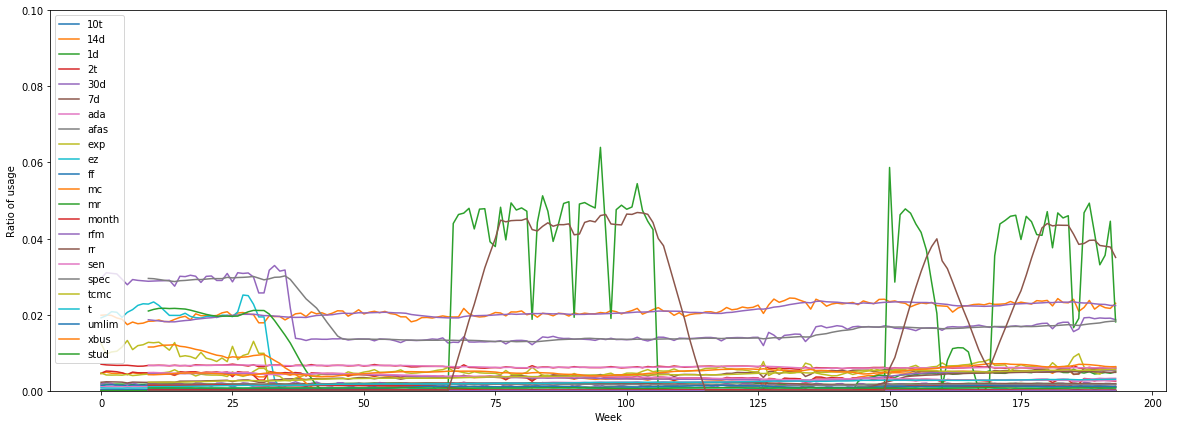

In [15]:
figsize(20,7)
for i in range(0,23):
    pl.plot(ratio[:,i])
for i in range(0,23):
    pl.plot(pd.rolling_mean(ratio[:,i],10))
pl.ylabel('Ratio of usage')
pl.xlabel('Week')
pl.legend(ridetype);
pl.ylim(0,.1);

In [16]:
ratiodf=pd.DataFrame(ratio[0:20,:])

In [17]:
ratiolastdf=pd.DataFrame(ratio[-20:,:])

In [18]:
mean_type=[]
for i in range(0,23):
    mean_type.append(np.mean(ratiodf[i])*100)

In [19]:
mean_type_last=[]
for i in range(0,23):
    mean_type_last.append(np.mean(ratiolastdf[i])*100)

In [20]:
mean_type=np.array(mean_type)
mean_type_last=np.array(mean_type_last)
mean_type[22]=0.00001

In [21]:
ratiochangedf=pd.DataFrame(((mean_type_last-mean_type)/(mean_type))*100,index=ridetype,columns=['Ratio change'])

In [22]:
ratiochangedf=ratiochangedf.sort('Ratio change',ascending=False)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [23]:
ratiochangedf

,Ratio change
stud,3.927182e+07
mr,3.160472e+06
spec,3.352786e+02
sen,1.578804e+02
rr,1.368365e+02
xbus,7.474800e+01
tcmc,4.290778e+01
7d,3.281189e+01
14d,2.146051e+01
mc,1.480309e+01


In [24]:
for i in range(0,3):
    print ('{} type increased a {}%'.format(ratiochangedf.index[i],int(ratiochangedf.iloc[i][0])))
for i in range(1,4):
    print ('{} type decreased a {}%'.format(ratiochangedf.index[-i],-int(ratiochangedf.iloc[-i][0])))

stud type increased a 39271816%
mr type increased a 3160472%
spec type increased a 335%
ez type decreased a 99%
exp type decreased a 99%
afas type decreased a 99%


In [25]:
data_all_type = np.nansum(data, axis = 1)

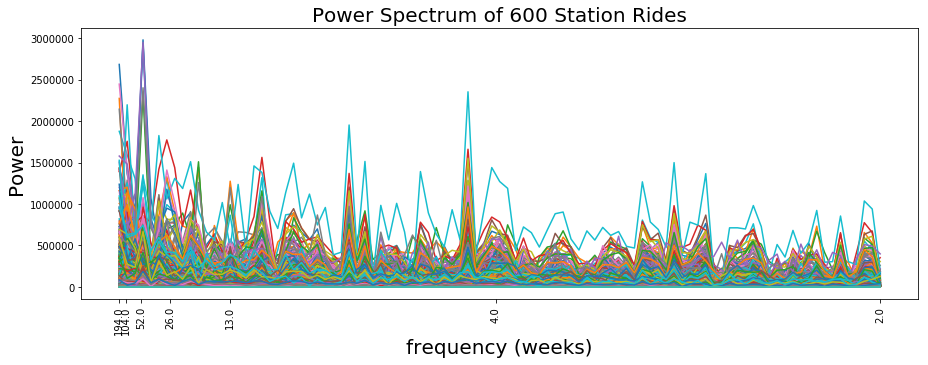

In [26]:
N = 194

fig = pl.figure(figsize=(15,5))
ax = fig.add_subplot(111)
allperiods = [1/194.0, 1/104.0, 1/52.0, 1/26.0, 1/13.0, 1/4.0, 1/2.0]

for i in range(len(data_all_type)):
    f = np.abs(np.fft.rfft(data_all_type[i]))
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')

# changing the labels on the x ticks to see the period instead of frequency
pl.xticks(allperiods)
ax.set_xticklabels([ "%s"%(1/f) for f in allperiods], fontsize=10, rotation=90)
pl.xlabel("frequency (weeks)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("Power Spectrum of 600 Station Rides", fontsize=20)
pl.show()

#### There is a peak with frequency 1/52 i.e. a whole year (52 weeks)

In [28]:
F = []
for i in range(len(data_all_type)):
    f = np.abs(np.fft.rfft(data_all_type[i]))
    F.append(f[4]) #52

In [29]:
trend = pd.DataFrame({'F':F, 'index' : range(600)})

In [30]:
trend.sort_values(['F'], ascending = 0)[0:4]

,F,index
0,2.980161e+06,0
194,2.950389e+06,194
150,2.931896e+06,150
327,2.402219e+06,327


#### These are the three stations that have the most periodic trends

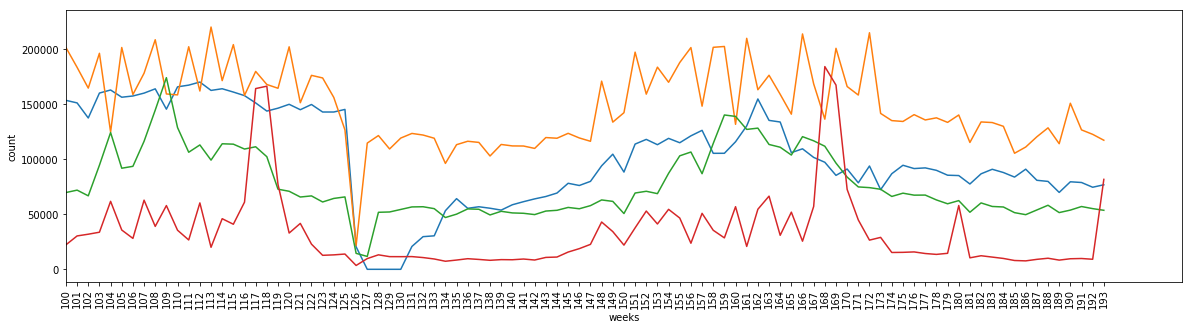

In [31]:
fig = pl.figure(figsize=(20,5))
ax = fig.add_subplot(111)

for i in [0,194,150,327]:
    ax.plot(range(194), data_all_type[i], '-')
pl.xlabel('weeks')
pl.ylabel('count')
pl.xticks(range(0,194),rotation=90)
pl.xlim(100,200)
pl.show()

In [32]:
str(start+datetime.timedelta(weeks=16))

'2010-09-10'

In [33]:
str(start+datetime.timedelta(weeks=43))

'2011-03-18'

In [34]:
str(start+datetime.timedelta(weeks=68))

'2011-09-09'

In [35]:
str(start+datetime.timedelta(weeks=95))

'2012-03-16'

In [36]:
str(start+datetime.timedelta(weeks=125))

'2012-10-12'

In [37]:
str(start+datetime.timedelta(weeks=148))

'2013-03-22'

#### These stations tend to peak from March to September probably because of spring break and holidays 

## ASH Score 100. Extra Credit 0